In [1]:
import numpy as np
import analyze_michell_truss as amt

import json
import pandas as pd

import pathlib

In [2]:
import matplotlib.pyplot as plt

In [63]:
data_folder = pathlib.Path("/Users/noah/harvard/2021/coursework_fall_2021/4450_COMPUTATIONAL_DESIGN/hw/2/truss_data")


for i in [4, 8, 16]:
    pos = [[[0., i / 2], [40., 0]]]
    file_name = data_folder.joinpath(f"{i}_two_bar.csv")
    with open(file_name, "w") as f:
        f.write(json.dumps(pos))

In [64]:
files = [*data_folder.glob('*.csv')]

In [65]:
def load_file(file_name):
    with open(file_name, 'r') as f:
        positions = json.load(f)
    
    height = positions[0][0][1] * 2
    beam_count = 2 * len(positions) ** 2
    return positions, height, beam_count

In [66]:
files[8]

PosixPath('/Users/noah/harvard/2021/coursework_fall_2021/4450_COMPUTATIONAL_DESIGN/hw/2/truss_data/16_3.csv')

# Problem 2

h: 16.0, bc: 50
adding [[ 9.96503897  0.        ]
 [11.73633167  2.2063751 ]]
adding [[11.73633167  2.2063751 ]
 [13.01910736  4.80493494]]
adding [[ 1.44846584e+01 -8.88178420e-16]
 [ 1.68313024e+01  2.92304982e+00]]
adding [[13.01910736  4.80493494]
 [13.72653179  7.68751618]]
adding [[16.83130238  2.92304982]
 [18.59363487  6.49306324]]
adding [[ 2.04723405e+01 -2.22044605e-15]
 [ 2.36723125e+01  3.98598063e+00]]
adding [[13.72653179  7.68751618]
 [13.79571933 10.72672938]]
adding [[18.59363487  6.49306324]
 [19.60020515 10.59459055]]
adding [[23.67231248  3.98598063]
 [26.14210558  8.98911968]]
adding [[ 2.86373690e+01 -6.66133815e-15]
 [ 3.30974574e+01  5.55561930e+00]]
adding [[ 9.96503897  0.        ]
 [11.73633167 -2.2063751 ]]
adding [[11.73633167 -2.2063751 ]
 [13.01910736 -4.80493494]]
adding [[ 1.44846584e+01 -8.88178420e-16]
 [ 1.68313024e+01 -2.92304982e+00]]
adding [[13.01910736 -4.80493494]
 [13.72653179 -7.68751618]]
adding [[16.83130238 -2.92304982]
 [18.59363487 -6.4

<IPython.core.display.Javascript object>


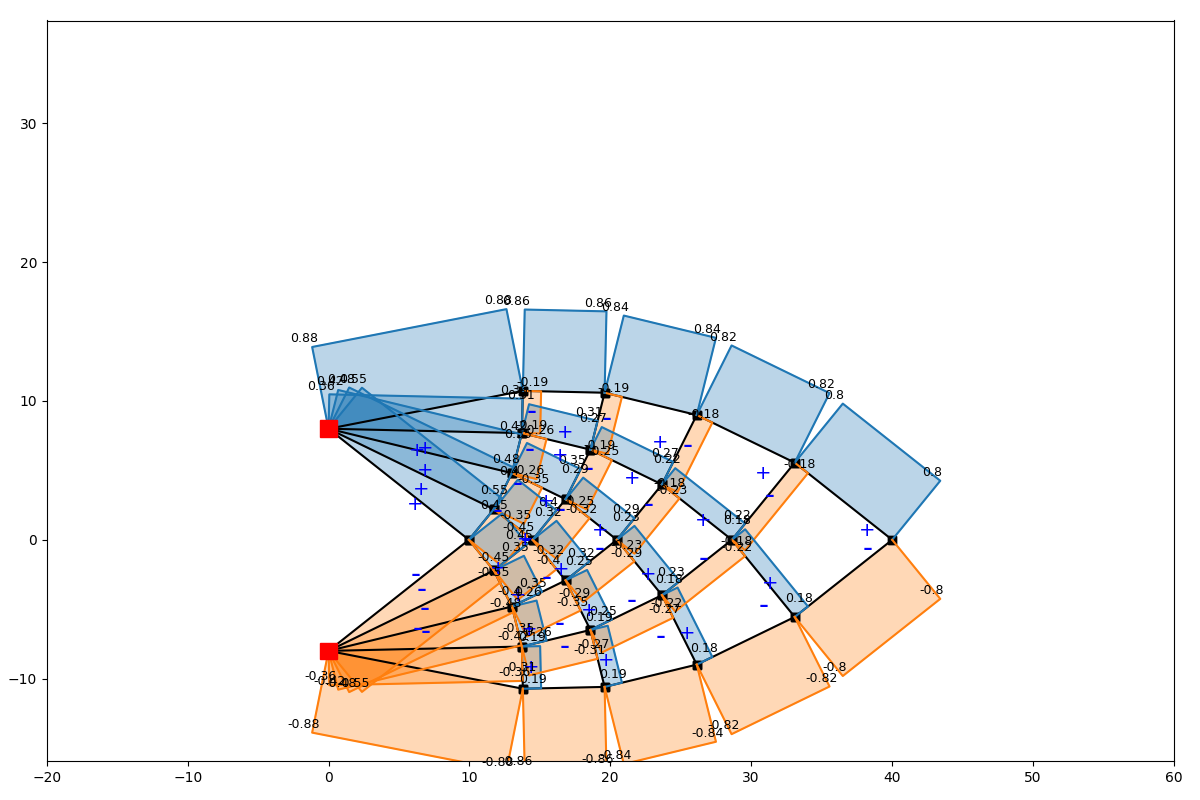

In [70]:
p, h, bc = load_file(files[8])
print(f"h: {h}, bc: {bc}")

mt = amt.MichellTruss(p)

mt.load()
mt.solve()

mt.ss.show_axial_force()
plt.savefig(data_folder.joinpath("load_example.png"))

In [8]:
data = []

# Simulate.
for f in files:
    p, h, bc = load_file(f)
    print(f"h: {h}, bc: {bc}")

    mt = amt.MichellTruss(p)

    mt.load()
    mt.solve()

    metric = mt.metric()

    data.append([h, bc, p, metric])

h: 4.0, bc: 8
adding [[6.46545629 0.        ]
 [9.38884818 9.45053125]]
adding [[ 6.46545629  0.        ]
 [ 9.38884818 -9.45053125]]
adding [[6.46545629 0.        ]
 [0.         2.        ]]
adding [[9.38884818 9.45053125]
 [0.         2.        ]]
adding [[ 3.99398465e+01 -1.77635684e-15]
 [ 9.38884818e+00  9.45053125e+00]]
adding [[ 6.46545629  0.        ]
 [ 0.         -2.        ]]
adding [[ 9.38884818 -9.45053125]
 [ 0.         -2.        ]]
adding [[ 3.99398465e+01 -1.77635684e-15]
 [ 9.38884818e+00 -9.45053125e+00]]
[ 9.89235872  9.89235872  6.76772672 11.98586193 31.97930645  6.76772672
 11.98586193 31.97930645]
[-2.47308957  2.47308957  7.99482649  2.9964654   1.69193169 -7.99482649
 -2.9964654  -1.69193169]
h: 4.0, bc: 18
adding [[4.14031472 0.        ]
 [5.72741702 3.2855515 ]]
adding [[5.72741702 3.2855515 ]
 [4.70726615 7.83054985]]
adding [[ 1.25290256e+01 -4.44089210e-16]
 [ 1.77228166e+01  1.07519646e+01]]
adding [[ 4.14031472  0.        ]
 [ 5.72741702 -3.2855515 ]]
a

In [9]:
df = pd.DataFrame(data, columns = ["height", "beam_count", "positions", "metric"])

In [10]:
df=df.sort_values("beam_count")
df=df.sort_values("height")

<IPython.core.display.Javascript object>


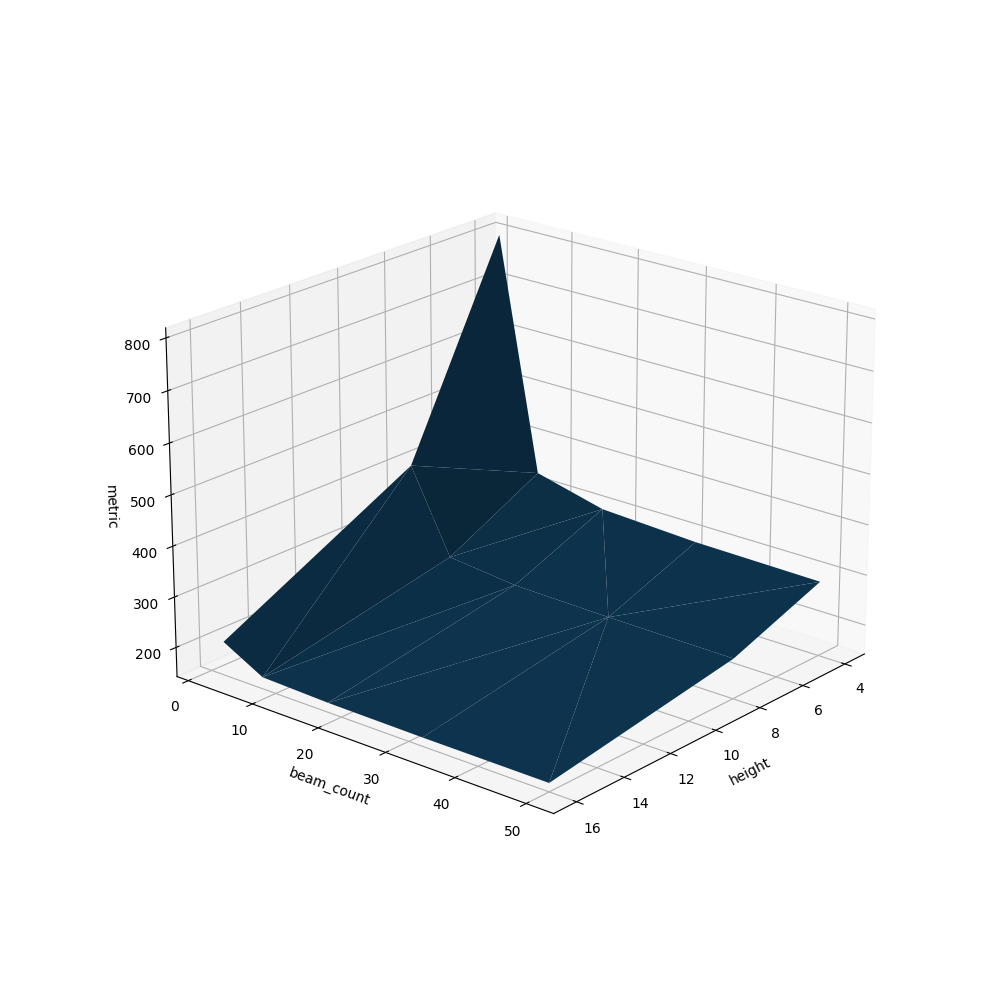

In [11]:
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = df['height']
y = df['beam_count']
z = df['metric']

ax.set_xlabel("height")
ax.set_ylabel("beam_count")
ax.set_zlabel("metric")

ax.plot_trisurf(x, y, z)

In [12]:
# Latex Export.

print(df[["height", "beam_count", "metric"]].to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 height &  beam\_count &     metric \\
\midrule
    4.0 &           2 & 802.000000 \\
    4.0 &           8 & 337.187025 \\
    4.0 &          18 & 302.984508 \\
    4.0 &          32 & 293.417207 \\
    4.0 &          50 & 290.015322 \\
    8.0 &           2 & 404.000000 \\
    8.0 &           8 & 241.070550 \\
    8.0 &          18 & 226.445616 \\
    8.0 &          32 & 222.813545 \\
    8.0 &          50 & 221.059456 \\
   16.0 &           2 & 208.000000 \\
   16.0 &           8 & 164.768411 \\
   16.0 &          18 & 160.457255 \\
   16.0 &          32 & 158.849185 \\
   16.0 &          50 & 158.592241 \\
\bottomrule
\end{tabular}



# Problem 3

In [51]:
import itertools

In [52]:
# Load structure
data_file = data_folder.joinpath("16_3.csv")
p, h, bc = load_file(data_file)

In [53]:
def stretch(p, factor_x, factor_y):
    return [[[c[0] * factor_x, c[1] * factor_y] if i > 0 else c for i, c in enumerate(coord_list)] for coord_list in p]

stretch_factors = np.linspace(.5, 2, 10)

In [59]:
stretch_data = []
for stretch_x, stretch_y in itertools.product(stretch_factors, stretch_factors):
    print(f"stretch {stretch_x}, {stretch_y}")
    p_ = stretch(p, stretch_x, stretch_y)

    # build and analyze
    mt = amt.MichellTruss(p_)
    mt.load()
    mt.solve()
    
    metric = mt.metric()
    
    stretch_data.append([stretch_x, stretch_y, metric])

stretch 0.5, 0.5
adding [[4.98251948 0.        ]
 [5.86816584 1.10318755]]
adding [[5.86816584 1.10318755]
 [6.50955368 2.40246747]]
adding [[ 7.24232921e+00 -4.44089210e-16]
 [ 8.41565119e+00  1.46152491e+00]]
adding [[6.50955368 2.40246747]
 [6.8632659  3.84375809]]
adding [[8.41565119 1.46152491]
 [9.29681743 3.24653162]]
adding [[ 1.02361703e+01 -1.11022302e-15]
 [ 1.18361562e+01  1.99299032e+00]]
adding [[6.8632659  3.84375809]
 [6.89785967 5.36336469]]
adding [[9.29681743 3.24653162]
 [9.80010258 5.29729527]]
adding [[11.83615624  1.99299032]
 [13.07105279  4.49455984]]
adding [[ 1.43186845e+01 -3.33066907e-15]
 [ 1.65487287e+01  2.77780965e+00]]
adding [[ 4.98251948  0.        ]
 [ 5.86816584 -1.10318755]]
adding [[ 5.86816584 -1.10318755]
 [ 6.50955368 -2.40246747]]
adding [[ 7.24232921e+00 -4.44089210e-16]
 [ 8.41565119e+00 -1.46152491e+00]]
adding [[ 6.50955368 -2.40246747]
 [ 6.8632659  -3.84375809]]
adding [[ 8.41565119 -1.46152491]
 [ 9.29681743 -3.24653162]]
adding [[ 1.0

[ 4.50074814  5.23654764  5.96268106  5.776003    7.1941947   8.13093608
  6.07852485  8.21847923 10.08219079 11.33281607  4.50074814  5.23654764
  5.96268106  5.776003    7.1941947   8.13093608  6.07852485  8.21847923
 10.08219079 11.33281607  9.42472813  6.87777081  4.62176258  6.70566702
  4.21890674  6.12300341 10.07449855  3.41013846  5.6205066   8.34955765
 15.11873079  2.91425061  4.58358616  7.69739757 11.6375286   9.42472813
  6.87777081  4.62176258  6.70566702  4.21890674  6.12300341 10.07449855
  3.41013846  5.6205066   8.34955765 15.11873079  2.91425061  4.58358616
  7.69739757 11.6375286 ]
[-0.99464838 -0.83679544 -0.25409175 -0.6397188  -0.22481856 -0.18633375
 -0.44276422 -0.18050003 -0.16364211 -0.14064839  0.99464838  0.83679544
  0.25409175  0.6397188   0.22481856  0.18633375  0.44276422  0.18050003
  0.16364211  0.14064839  1.14887574  0.20019783  0.26092367  0.14697056
  0.17564077  0.19134381  0.16543662  0.10656685  0.13184087  0.1444301
  0.47561385  0.21536445  

 [ 0.          8.        ]]
adding [[15.49469572  3.24653162]
 [11.43877649  3.84375809]]
adding [[19.72692707  1.99299032]
 [15.49469572  3.24653162]]
adding [[ 2.38644742e+01 -3.33066907e-15]
 [ 1.97269271e+01  1.99299032e+00]]
adding [[11.49643278  5.36336469]
 [ 0.          8.        ]]
adding [[16.33350429  5.29729527]
 [11.49643278  5.36336469]]
adding [[21.78508799  4.49455984]
 [16.33350429  5.29729527]]
adding [[27.58121449  2.77780965]
 [21.78508799  4.49455984]]
adding [[ 3.33480856e+01 -8.43769499e-15]
 [ 2.75812145e+01  2.77780965e+00]]
adding [[ 8.30419914  0.        ]
 [ 0.         -8.        ]]
adding [[ 9.7802764  -1.10318755]
 [ 0.         -8.        ]]
adding [[ 1.20705487e+01 -4.44089210e-16]
 [ 9.78027640e+00 -1.10318755e+00]]
adding [[10.84925614 -2.40246747]
 [ 0.         -8.        ]]
adding [[14.02608531 -1.46152491]
 [10.84925614 -2.40246747]]
adding [[ 1.70602838e+01 -1.11022302e-15]
 [ 1.40260853e+01 -1.46152491e+00]]
adding [[11.43877649 -3.84375809]
 [ 0. 

 [ 2.75812145e+01 -1.11112386e+01]]
[ 4.65308161  5.30591845  6.16449548  5.79522498  7.28949929  8.4061378
  6.07869985  8.24582953 10.21575391 11.71638944  4.65308161  5.30591845
  6.16449548  5.79522498  7.28949929  8.4061378   6.07869985  8.24582953
 10.21575391 11.71638944 11.53081625 10.41739734  4.97169101 10.9680463
  4.92526243  6.58659558 13.61016936  4.70715966  6.56152688  8.98172937
 17.69642674  4.84428566  6.32691959  8.9861439  12.51864312 11.53081625
 10.41739734  4.97169101 10.9680463   4.92526243  6.58659558 13.61016936
  4.70715966  6.56152688  8.98172937 17.69642674  4.84428566  6.32691959
  8.9861439  12.51864312]
[-1.02831354 -0.84788091 -0.26269175 -0.64184774 -0.22779679 -0.19264049
 -0.44277698 -0.18110073 -0.16580996 -0.14540878  1.02831354  0.84788091
  0.26269175  0.64184774  0.22779679  0.19264049  0.44277698  0.18110073
  0.16580996  0.14540878  1.40560826  0.30322906  0.28067901  0.24039072
  0.20504769  0.20583113  0.22349705  0.14709872  0.15391442  0.

 [ 26.14210558 -17.97823937]]
adding [[ 2.86373690e+01 -1.33226763e-14]
 [ 3.30974574e+01 -1.11112386e+01]]
adding [[9.96503897 0.        ]
 [0.         8.        ]]
adding [[11.73633167  4.41275021]
 [ 0.          8.        ]]
adding [[ 1.44846584e+01 -1.77635684e-15]
 [ 1.17363317e+01  4.41275021e+00]]
adding [[13.01910736  9.60986988]
 [ 0.          8.        ]]
adding [[16.83130238  5.84609964]
 [13.01910736  9.60986988]]
adding [[ 2.04723405e+01 -4.44089210e-15]
 [ 1.68313024e+01  5.84609964e+00]]
adding [[13.72653179 15.37503235]
 [ 0.          8.        ]]
adding [[18.59363487 12.98612649]
 [13.72653179 15.37503235]]
adding [[23.67231248  7.97196126]
 [18.59363487 12.98612649]]
adding [[ 2.86373690e+01 -1.33226763e-14]
 [ 2.36723125e+01  7.97196126e+00]]
adding [[13.79571933 21.45345876]
 [ 0.          8.        ]]
adding [[19.60020515 21.18918109]
 [13.79571933 21.45345876]]
adding [[26.14210558 17.97823937]
 [19.60020515 21.18918109]]
adding [[33.09745739 11.11123859]
 [26.142

[ 4.54231781  4.99356324  6.01775338  5.34879073  6.86037226  8.20603476
  5.57247552  7.61061334  9.61436059 11.43748785  4.54231781  4.99356324
  6.01775338  5.34879073  6.86037226  8.20603476  5.57247552  7.61061334
  9.61436059 11.43748785 14.11244337 14.25213385  5.16169308 15.21049048
  5.62886705  6.83831412 17.13451317  6.08590991  7.49888214  9.32498223
 19.87805532  6.77623188  8.18010551 10.26987089 12.99706546 14.11244337
 14.25213385  5.16169308 15.21049048  5.62886705  6.83831412 17.13451317
  6.08590991  7.49888214  9.32498223 19.87805532  6.77623188  8.18010551
 10.26987089 12.99706546]
[-1.01709016 -0.81424964 -0.27975123 -0.60866314 -0.23387634 -0.2051507
 -0.41967919 -0.18234516 -0.17023511 -0.15485175  1.01709016  0.81424964
  0.27975123  0.60866314  0.23387634  0.2051507   0.41967919  0.18234516
  0.17023511  0.15485175  1.59777245  0.43317683  0.31789712  0.35260478
  0.2556438   0.23312433  0.3011025   0.20747417  0.1918932   0.17596678
  0.68177032  0.54629084  

[ 4.68400827  5.06174915  6.20546774  5.36824765  6.954049    8.46200912
  5.57265448  7.63829793  9.74564238 11.79426231  4.68400827  5.06174915
  6.20546774  5.36824765  6.954049    8.46200912  5.57265448  7.63829793
  9.74564238 11.79426231 15.50925181 16.14049575  5.45804761 17.37765335
  6.14324755  7.23093052 19.28986538  6.84898444  8.18414947  9.86036872
 21.7815946   7.743105    9.20575825 11.20835838 13.74328171 15.50925181
 16.14049575  5.45804761 17.37765335  6.14324755  7.23093052 19.28986538
  6.84898444  8.18414947  9.86036872 21.7815946   7.743105    9.20575825
 11.20835838 13.74328171]
[-1.04881669 -0.825368   -0.28847761 -0.61087717 -0.2370699  -0.21155001
 -0.41969274 -0.18300845 -0.17255962 -0.15968212  1.04881669  0.825368
  0.28847761  0.61087717  0.2370699   0.21155001  0.41969274  0.18300845
  0.17255962  0.15968212  1.75591529  0.49057131  0.33614896  0.40284347
  0.27900503  0.24650894  0.33897784  0.2334882   0.20942895  0.18606982
  0.74705739  0.62423882  0

[ 4.83957852  5.13793271  6.41157031  5.39021392  7.05871325  8.74305833
  5.5728573   7.669553    9.89232245 12.18598585  4.83957852  5.13793271
  6.41157031  5.39021392  7.05871325  8.74305833  5.5728573   7.669553
  9.89232245 12.18598585 16.95374601 18.0432866   5.77556229 19.54541276
  6.67848906  7.65158031 21.47263187  7.62200202  8.89720824 10.43398259
 23.75525375  8.7100983  10.2447755  12.1849068  14.54277889 16.95374601
 18.0432866   5.77556229 19.54541276  6.67848906  7.65158031 21.47263187
  7.62200202  8.89720824 10.43398259 23.75525375  8.7100983  10.2447755
 12.1849068  14.54277889]
[-1.08365109 -0.83779044 -0.29805885 -0.61337679 -0.24063803 -0.2185762
 -0.41970799 -0.18375734 -0.17515674 -0.16498566  1.08365109  0.83779044
  0.29805885  0.61337679  0.24063803  0.2185762   0.41970799  0.18375734
  0.17515674  0.16498566  1.91945696  0.54840448  0.35570399  0.45309573
  0.30331391  0.26084926  0.37733531  0.25984095  0.22767582  0.19689423
  0.81474919  0.70219658  0.6

 12.92777411 14.79064094]
[-1.05957546 -0.79666838 -0.31947125 -0.57401487 -0.24883163 -0.23427885
 -0.39202774 -0.1855073  -0.18112099 -0.17683818  1.05957546  0.79666838
  0.31947125  0.57401487  0.24883163  0.23427885  0.39202774  0.1855073
  0.18112099  0.17683818  1.90397708  0.63597688  0.39794305  0.53325274
  0.35398635  0.29182475  0.44153986  0.31322044  0.26571184  0.22027487
  0.94343717  0.85813067  0.83783967  0.81802841  0.79868558 -1.90397708
 -0.63597688 -0.39794305 -0.53325274 -0.35398635 -0.29182475 -0.44153986
 -0.31322044 -0.26571184 -0.22027487 -0.94343717 -0.85813067 -0.83783967
 -0.81802841 -0.79868558]
stretch 1.6666666666666665, 1.8333333333333333
adding [[16.60839828  0.        ]
 [19.56055279  4.04502102]]
adding [[19.56055279  4.04502102]
 [21.69851227  8.80904739]]
adding [[ 2.41410974e+01 -1.62832710e-15]
 [ 2.80521706e+01  5.35892467e+00]]
adding [[21.69851227  8.80904739]
 [22.87755299 14.09377966]]
adding [[28.05217063  5.35892467]
 [30.98939145 11.903

[ 4.90590327  4.9282588   6.49943867  4.97628216  6.7706542   8.86287893
  5.06694327  7.08058349  9.48862663 12.35299058  4.90590327  4.9282588
  6.49943867  4.97628216  6.7706542   8.86287893  5.06694327  7.08058349
  9.48862663 12.35299058 19.94404826 21.94653113  6.23778449 23.86836492
  7.66054409  8.26394152 25.62134183  9.1423975  10.20552036 11.26902135
 27.1526337  10.64383598 12.28834755 13.97666673 15.70664743 19.94404826
 21.94653113  6.23778449 23.86836492  7.66054409  8.26394152 25.62134183
  9.1423975  10.20552036 11.26902135 27.1526337  10.64383598 12.28834755
 13.97666673 15.70664743]
[-1.1023158  -0.81289367 -0.33235788 -0.57742847 -0.25389941 -0.243729
 -0.39204913 -0.1866105  -0.18480975 -0.18397136  1.1023158   0.81289367
  0.33235788  0.57742847  0.25389941  0.243729    0.39204913  0.1866105
  0.18480975  0.18397136  2.05986369  0.69674199  0.42258817  0.58657836
  0.38270707  0.30989784  0.48390412  0.34283983  0.28727038  0.23391688
  1.02365378  0.94390129  0.9

[ 5.10611268  5.03378933  6.76468009  5.00830466  6.91563659  9.2245721
  5.06724505  7.12614723  9.69180992 12.85711485  5.10611268  5.03378933
  6.76468009  5.00830466  6.91563659  9.2245721   5.06724505  7.12614723
  9.69180992 12.85711485 21.47575393 23.86737796  6.6132953  26.03821603
  8.24431925  8.76142574 27.87169023  9.93568691 10.98323656 11.94740954
 29.3063141  11.61106043 13.35461228 15.04176481 16.65217799 21.47575393
 23.86737796  6.6132953  26.03821603  8.24431925  8.76142574 27.87169023
  9.93568691 10.98323656 11.94740954 29.3063141  11.61106043 13.35461228
 15.04176481 16.65217799]
[-1.14730116 -0.83030029 -0.34592145 -0.58114427 -0.25933631 -0.25367551
 -0.3920724  -0.18781132 -0.18876714 -0.19147922  1.14730116  0.83030029
  0.34592145  0.58114427  0.25933631  0.25367551  0.3920724   0.18781132
  0.18876714  0.19147922  2.21806149  0.75772387  0.44802777  0.63990317
  0.41187127  0.32855338  0.52640629  0.37258836  0.30916198  0.24799859
  1.10484726  1.02967518  

In [60]:
df = pd.DataFrame(stretch_data, columns = ["stretch_x", "stretch_y", "metric"])

<IPython.core.display.Javascript object>


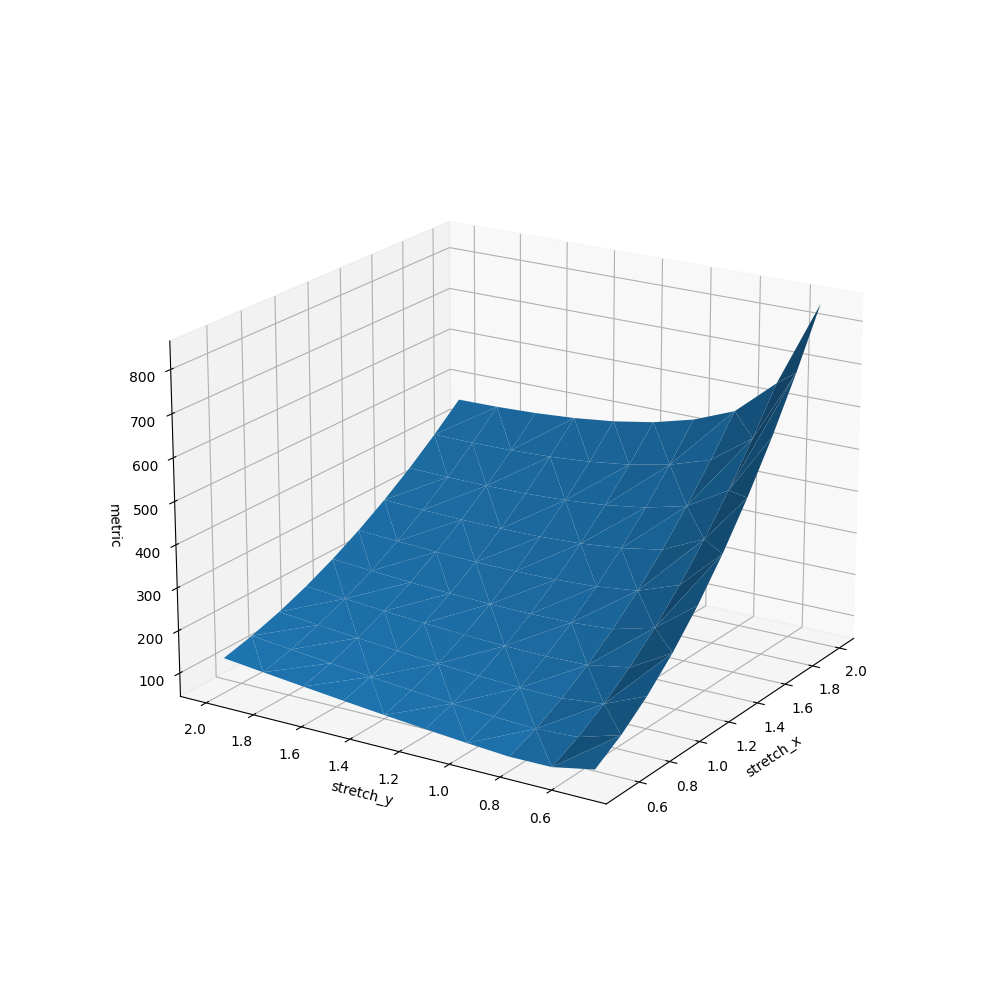

In [61]:
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = df['stretch_x']
y = df['stretch_y']
z = df['metric']

ax.set_xlabel("stretch_x")
ax.set_ylabel("stretch_y")
ax.set_zlabel("metric")

ax.plot_trisurf(x, y, z)

In [62]:
# Latex Export.

print(df.to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 stretch\_x &  stretch\_y &     metric \\
\midrule
  0.500000 &   0.500000 &  80.371740 \\
  0.500000 &   0.666667 &  61.455593 \\
  0.500000 &   0.833333 &  60.943272 \\
  0.500000 &   1.000000 &  68.044504 \\
  0.500000 &   1.166667 &  76.363426 \\
  0.500000 &   1.333333 &  85.497649 \\
  0.500000 &   1.500000 &  95.207615 \\
  0.500000 &   1.666667 & 105.340743 \\
  0.500000 &   1.833333 & 115.794755 \\
  0.500000 &   2.000000 & 126.498292 \\
  0.666667 &   0.500000 & 120.136152 \\
  0.666667 &   0.666667 &  91.686720 \\
  0.666667 &   0.833333 &  86.803665 \\
  0.666667 &   1.000000 &  91.519841 \\
  0.666667 &   1.166667 &  98.082898 \\
  0.666667 &   1.333333 & 105.866896 \\
  0.666667 &   1.500000 & 114.504401 \\
  0.666667 &   1.666667 & 123.764083 \\
  0.666667 &   1.833333 & 133.492362 \\
  0.666667 &   2.000000 & 143.582962 \\
  0.833333 &   0.500000 & 171.261843 \\
  0.833333 &   0.666667 & 130.555323 \\
  0.833333 &   0.833333 & 120.052751 \\